In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [14]:
# test db 
# conn = engine.connect()

# msrmnt_df = pd.read_sql("SELECT * FROM measurement;", conn)
# stn_df = pd.read_sql("SELECT * FROM station;", conn)

# msrmnt_df
# stn_df

In [15]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date))[0][0]
# for row in session.query(func.max(measurement.date)):
#     print(row[0])
most_recent_date

'2017-08-23'

Most recent data point in the database.
('2017-08-23', 0.0)
('2017-08-23', 0.0)
('2017-08-23', 0.08)
('2017-08-23', 0.45)
Data and precipitation scores
('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-

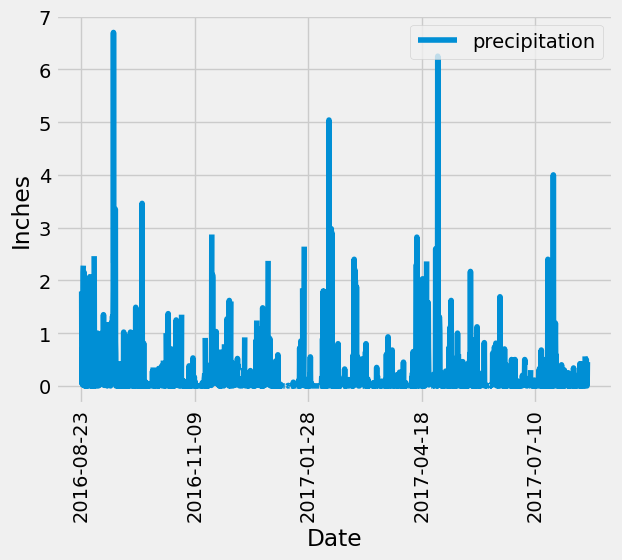

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print('Most recent data point in the database.')
for x in session.query(measurement.date, measurement.prcp).filter(measurement.date == most_recent_date).all():
    print(x)
# Calculate the date one year from the last date in data set.
from datetime import datetime
from dateutil.relativedelta import relativedelta
date_object = datetime.strptime(most_recent_date, '%Y-%m-%d').date()
year_prior = date_object+ relativedelta(months=-12)

# Perform a query to retrieve the data and precipitation scores
print('Data and precipitation scores')
for x in session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_prior).all():
    print(x)

# Save the query results as a Pandas DataFrame and set the index to the date column
year_prior_df = pd.DataFrame(session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_prior).all())
year_prior_df
# Sort the dataframe by date
year_prior_df = year_prior_df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
year_prior_df.plot(x='date', y='prcp', ylabel='Inches', xlabel='Date')
plt.legend(['precipitation'], loc='upper right')
plt.xticks(rotation=90)
plt.show()



In [26]:
precipitation_data = {}
for x in session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_prior).all():
    precipitation_data[x[0]] = x[1]

{'2016-08-23': 0.7, '2016-08-24': 1.45, '2016-08-25': 0.11, '2016-08-26': 0.01, '2016-08-27': None, '2016-08-28': 2.07, '2016-08-29': 0.9, '2016-08-30': 0.05, '2016-08-31': 2.46, '2016-09-01': 0.01, '2016-09-02': 0.03, '2016-09-03': 1.0, '2016-09-04': 0.44, '2016-09-05': 0.18, '2016-09-06': 1.0, '2016-09-07': 1.35, '2016-09-08': 0.15, '2016-09-09': 0.35, '2016-09-10': 1.16, '2016-09-11': 0.6, '2016-09-12': 1.04, '2016-09-13': 1.2, '2016-09-14': 6.7, '2016-09-15': 3.35, '2016-09-16': 0.61, '2016-09-17': 0.23, '2016-09-18': 0.42, '2016-09-19': 0.25, '2016-09-20': 0.43, '2016-09-21': 1.02, '2016-09-22': 0.75, '2016-09-23': 0.33, '2016-09-24': 0.27, '2016-09-25': 0.04, '2016-09-26': 1.02, '2016-09-27': 1.0, '2016-09-28': 0.05, '2016-09-29': 1.49, '2016-09-30': 0.38, '2016-10-01': 1.02, '2016-10-02': 0.61, '2016-10-03': 0.46, '2016-10-04': 3.46, '2016-10-05': 0.81, '2016-10-06': 0.04, '2016-10-07': 0.01, '2016-10-08': 0.04, '2016-10-09': 0.0, '2016-10-10': 0.0, '2016-10-11': 0.35, '2016-10-

In [176]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_prior_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number stations in the dataset
session.query(station.station).count()

9

In [81]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
for x in session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count().desc()):
    print(f"Station: {x.station}, Count: {x[1]}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [114]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(measurement.station).group_by(measurement.station).order_by(func.count().desc()).limit(1)[0][0]
for x in session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active_station):
    # print(x)
    print(f"Station id: {x[0]}")
    print(f"Lowest Temperature: {x[1]}")
    print(f"Highest Temperature: {x[2]}")
    print(f"Average Temperature: {x[3]}")

Station id: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


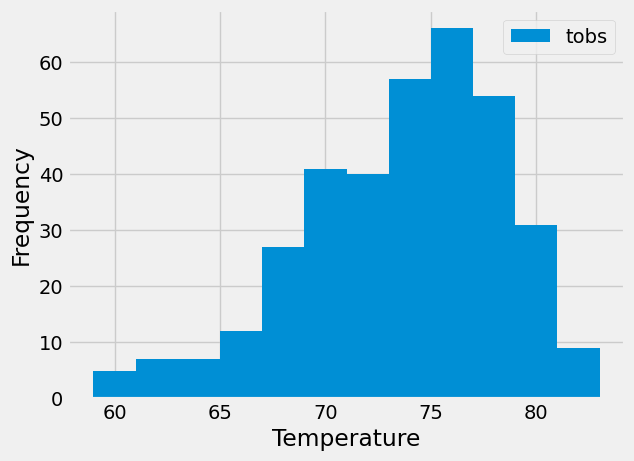

In [182]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# '2017-08-18'
last_12_mon = session.query(measurement.station, measurement.date, measurement.tobs).filter(measurement.station == most_active_station, measurement.date > '2016-08-18').all()
# for x in last_12_mon:
#     print(x)

last_12_mon_df = pd.DataFrame(last_12_mon)
last_12_mon_df.hist(bins=12, legend=True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title("")
plt.show()

# Close session

In [180]:
# Close Session
session.close()